# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
     city_tuple=citipy.nearest_city(lat_lng[0], lat_lng[1])
     # keeping both city name and country code   
     (name,code)=(city_tuple.city_name,city_tuple.country_code)

    # If the city is unique, then add it to a our cities list
     if (name,code) not in cities: cities.append((name,code))

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
# for i, city in enumerate(cities):
for i, (name,code) in enumerate(cities):    
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url_C = f"{url}{name},{code}&appid={weather_api_key}&units=metric"
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | City Name: %s; Country Code: %s" % (record_count, set_count, name, code))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url_C).json()

        # Celsius: Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"] # Latitude of the location
        city_lng = city_weather["coord"]["lon"] # Longitude of the location
        city_max_temp_C = city_weather["main"]["temp_max"] # Maximum temperature at the moment. Units=Metric: Celsius; 
        city_humidity = city_weather["main"]["humidity"] # Humidity, %
        city_clouds = city_weather["clouds"]["all"] # Cloudiness, %
        city_wind = city_weather["wind"]["speed"] # Wind speed. Unit Default: meter/sec, Metric: meter/sec, Imperial: miles/hour
        city_country = city_weather["sys"]["country"] #  Country code (GB, JP etc.)
        city_date = city_weather["dt"] # Time of data calculation, unix, UTC
        

        # Append the City information into city_data list
        city_data.append({"City": name.upper(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp C": city_max_temp_C,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

        # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | City Name: dudinka; Country Code: ru
Processing Record 2 of Set 1 | City Name: yellowknife; Country Code: ca
Processing Record 3 of Set 1 | City Name: stanley; Country Code: fk
Processing Record 4 of Set 1 | City Name: port-aux-francais; Country Code: tf
Processing Record 5 of Set 1 | City Name: invercargill; Country Code: nz
Processing Record 6 of Set 1 | City Name: kidal; Country Code: ml
Processing Record 7 of Set 1 | City Name: ciudad lazaro cardenas; Country Code: mx
Processing Record 8 of Set 1 | City Name: jamestown; Country Code: sh
Processing Record 9 of Set 1 | City Name: olonkinbyen; Country Code: sj
Processing Record 10 of Set 1 | City Name: taiohae; Country Code: pf
City not found. Skipping...
Processing Record 11 of Set 1 | City Name: rongelap; Country Code: mh
Processing Record 12 of Set 1 | City Name: tuba city; Country Code: us
Processing Record 13 of Set 1 | City Name: karmaskal

Processing Record 12 of Set 3 | City Name: lewistown; Country Code: us
Processing Record 13 of Set 3 | City Name: trelew; Country Code: ar
Processing Record 14 of Set 3 | City Name: kodiak; Country Code: us
Processing Record 15 of Set 3 | City Name: karratha; Country Code: au
Processing Record 16 of Set 3 | City Name: kirkwall; Country Code: gb
Processing Record 17 of Set 3 | City Name: kismayo; Country Code: so
Processing Record 18 of Set 3 | City Name: salinopolis; Country Code: br
Processing Record 19 of Set 3 | City Name: nizhneudinsk; Country Code: ru
Processing Record 20 of Set 3 | City Name: barra do corda; Country Code: br
Processing Record 21 of Set 3 | City Name: thompson; Country Code: ca
Processing Record 22 of Set 3 | City Name: college; Country Code: us
Processing Record 23 of Set 3 | City Name: keflavik; Country Code: is
Processing Record 24 of Set 3 | City Name: astaneh-ye ashrafiyeh; Country Code: ir
Processing Record 25 of Set 3 | City Name: vung tau; Country Code: vn

Processing Record 26 of Set 5 | City Name: shalkar; Country Code: kz
Processing Record 27 of Set 5 | City Name: fale old settlement; Country Code: tk
Processing Record 28 of Set 5 | City Name: udachny; Country Code: ru
Processing Record 29 of Set 5 | City Name: pacific grove; Country Code: us
Processing Record 30 of Set 5 | City Name: hau-ri; Country Code: kp
Processing Record 31 of Set 5 | City Name: kununurra; Country Code: au
Processing Record 32 of Set 5 | City Name: ongjin; Country Code: kp
Processing Record 33 of Set 5 | City Name: nadym; Country Code: ru
Processing Record 34 of Set 5 | City Name: palmer; Country Code: us
Processing Record 35 of Set 5 | City Name: gagliano del capo; Country Code: it
Processing Record 36 of Set 5 | City Name: nguigmi; Country Code: ne
Processing Record 37 of Set 5 | City Name: pokhara; Country Code: np
Processing Record 38 of Set 5 | City Name: mul; Country Code: in
Processing Record 39 of Set 5 | City Name: tumkur; Country Code: in
Processing Rec

Processing Record 41 of Set 7 | City Name: raduzhny; Country Code: ru
Processing Record 42 of Set 7 | City Name: dalnerechensk; Country Code: ru
Processing Record 43 of Set 7 | City Name: kataragama; Country Code: lk
City not found. Skipping...
Processing Record 44 of Set 7 | City Name: ujae; Country Code: mh
Processing Record 45 of Set 7 | City Name: martapura; Country Code: id
Processing Record 46 of Set 7 | City Name: mpophomeni; Country Code: za
Processing Record 47 of Set 7 | City Name: usogorsk; Country Code: ru
Processing Record 48 of Set 7 | City Name: tobruk; Country Code: ly
Processing Record 49 of Set 7 | City Name: palikir - national government center; Country Code: fm
Processing Record 0 of Set 8 | City Name: vila velha; Country Code: br
Processing Record 1 of Set 8 | City Name: andergrove; Country Code: au
Processing Record 2 of Set 8 | City Name: kotido; Country Code: ug
Processing Record 3 of Set 8 | City Name: scarborough; Country Code: tt
Processing Record 4 of Set 8 

Processing Record 4 of Set 10 | City Name: mangrol; Country Code: in
Processing Record 5 of Set 10 | City Name: kharp; Country Code: ru
Processing Record 6 of Set 10 | City Name: tarrafal; Country Code: cv
Processing Record 7 of Set 10 | City Name: hope; Country Code: us
Processing Record 8 of Set 10 | City Name: daru; Country Code: pg
Processing Record 9 of Set 10 | City Name: cabedelo; Country Code: br
Processing Record 10 of Set 10 | City Name: ishpeming; Country Code: us
Processing Record 11 of Set 10 | City Name: yahotyn; Country Code: ua
Processing Record 12 of Set 10 | City Name: luquillo; Country Code: pr
Processing Record 13 of Set 10 | City Name: okuchi-shinohara; Country Code: jp
Processing Record 14 of Set 10 | City Name: lazaro cardenas; Country Code: mx
Processing Record 15 of Set 10 | City Name: olyokminsk; Country Code: ru
Processing Record 16 of Set 10 | City Name: sitka; Country Code: us
Processing Record 17 of Set 10 | City Name: tazacorte; Country Code: es
Processin

Processing Record 18 of Set 12 | City Name: saint croix; Country Code: vi
Processing Record 19 of Set 12 | City Name: machico; Country Code: pt
Processing Record 20 of Set 12 | City Name: ormara; Country Code: pk
Processing Record 21 of Set 12 | City Name: sale; Country Code: au
Processing Record 22 of Set 12 | City Name: san juan; Country Code: pr
Processing Record 23 of Set 12 | City Name: al kharijah; Country Code: eg
Processing Record 24 of Set 12 | City Name: calipatria; Country Code: us
Processing Record 25 of Set 12 | City Name: rundu; Country Code: na
Processing Record 26 of Set 12 | City Name: midvagur; Country Code: fo
Processing Record 27 of Set 12 | City Name: tamanrasset; Country Code: dz
Processing Record 28 of Set 12 | City Name: am timan; Country Code: td
Processing Record 29 of Set 12 | City Name: san-pedro; Country Code: ci
Processing Record 30 of Set 12 | City Name: laoang; Country Code: ph
Processing Record 31 of Set 12 | City Name: solnechnyy; Country Code: ru
Proc

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp C    562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp C,Humidity,Cloudiness,Wind Speed,Country,Date
0,DUDINKA,69.4058,86.1778,-0.21,98,100,6.43,RU,1695937428
1,YELLOWKNIFE,62.4560,-114.3525,7.29,93,100,2.06,CA,1695937428
2,STANLEY,-51.7000,-57.8500,7.16,76,26,6.47,FK,1695937429
3,PORT-AUX-FRANCAIS,-49.3500,70.2167,1.62,72,28,14.98,TF,1695937429
4,INVERCARGILL,-46.4000,168.3500,9.45,91,97,6.26,NZ,1695937429


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp C,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,DUDINKA,69.4058,86.1778,-0.21,98,100,6.43,RU,1695937428
1,YELLOWKNIFE,62.4560,-114.3525,7.29,93,100,2.06,CA,1695937428
2,STANLEY,-51.7000,-57.8500,7.16,76,26,6.47,FK,1695937429
3,PORT-AUX-FRANCAIS,-49.3500,70.2167,1.62,72,28,14.98,TF,1695937429
4,INVERCARGILL,-46.4000,168.3500,9.45,91,97,6.26,NZ,1695937429


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

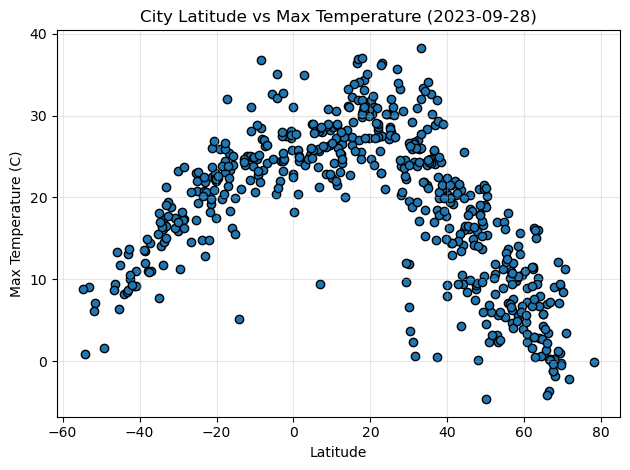

In [8]:
def plot_scatter (df, x_column_name, y_column_name, x_label, y_label, unit, export=False, fig_name="Default"):
    plt.scatter(x=df[x_column_name],y=df[y_column_name],marker="o", edgecolor="black")
    # Incorporate the other graph properties
    plt.grid(alpha=0.3)
    plt.xlabel(x_label)
    plt.ylabel(f"{y_label} ({unit})")
    try:
        converted_date=time.strftime("%Y-%m-%d",time.gmtime(df["Date"].min()))
        plt.title(f"City {x_label} vs {y_label} ({converted_date})")
    except: plt.title(f"City {x_label} vs {y_label}")
    plt.tight_layout()
    # Save the figure
    if export: plt.savefig(f"output_data/{fig_name}.png")
    # Show plot
    plt.show()
    

# Build scatter plot for latitude vs. temperature
plot_scatter(city_data_df,"Lat","Max Temp C","Latitude","Max Temperature","C", export=True, fig_name="Fig1")




#### Latitude Vs. Humidity

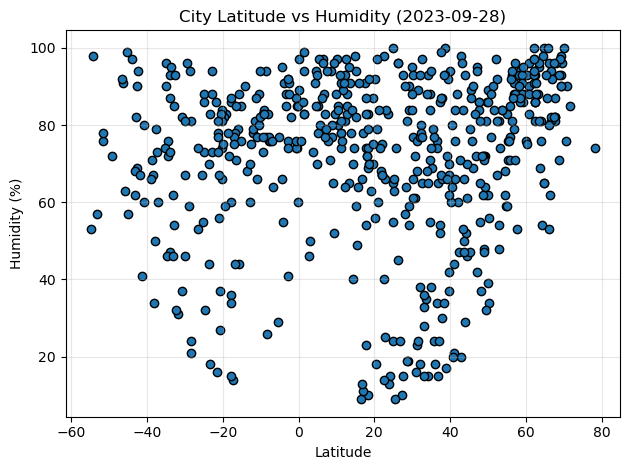

In [9]:
# Build the scatter plots for latitude vs. humidity
plot_scatter(city_data_df,"Lat","Humidity","Latitude","Humidity","%", export=True, fig_name="Fig2")



#### Latitude Vs. Cloudiness

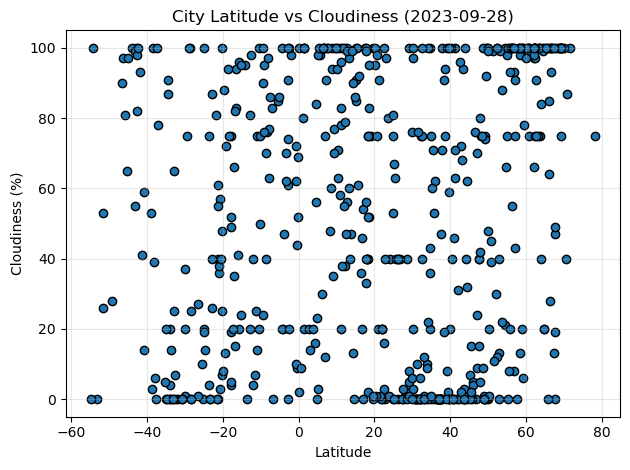

In [60]:
# Build the scatter plots for latitude vs. cloudiness
plot_scatter(city_data_df,"Lat","Cloudiness","Latitude","Cloudiness","%", export=True, fig_name="Fig3")


#### Latitude vs. Wind Speed Plot

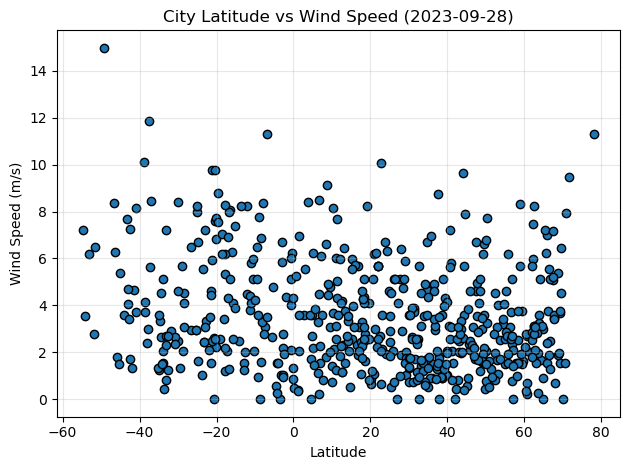

In [61]:
# Build the scatter plots for latitude vs. wind speed
plot_scatter(city_data_df,"Lat","Wind Speed","Latitude","Wind Speed","m/s", export=True, fig_name="Fig4")


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [49]:
# Define a function to create Linear Regression plots
def lin_reg(df, x_column_name, y_column_name, x_label, y_label, unit, title_base, min_y, max_y):
    slope, b, lin_corr, _, _ = linregress(df[x_column_name],df[y_column_name])
    pred=slope*df[x_column_name]+b
    
    #print r-value
    print(f"The r-value is:{lin_corr}")

    # Create line equation string
    if abs(round(slope,2))>0: eq=f"y = {round(slope,2)}x +{round(b,2)}"
    else: #we want to omit y=0.0x+b situation
        non_zero_decimal_position=2
        decimals=str(slope).split(".")[1] #https://www.softwaretestinghelp.com/python/python-string-split/
        i=decimals[2] #https://buzzcoder.gitbooks.io/codecraft-python/content/string/loop-through-a-string.html
        while i=='0': 
            non_zero_decimal_position+=1
            i=decimals[non_zero_decimal_position]
        eq=f"y = {round(slope,non_zero_decimal_position+1)}x +{round(b,2)}"
        
    #plot the above regression line along with x_column_name vs y_column_name dependency
    fig, ax = plt.subplots(1,1)
    #setting y limits to have same limits for same measurements
    delta=(max_y-min_y)/70
    ax.set_ylim(min_y-delta, max_y+delta)
    #plot
    ax.scatter(x=df[x_column_name],y=df[y_column_name], marker="o", edgecolor="black")
    ax.plot(df[x_column_name],pred, color="fuchsia")
    #annotation
    x_p=df[x_column_name].max()-(df[x_column_name].max()-df[x_column_name].min())/2
    y_p=slope*x_p+b+(df[y_column_name].max()-df[y_column_name].min())/50
    ax.annotate(eq,(x_p,y_p),fontsize=14, fontweight="bold", color="fuchsia", bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    #labels...
    ax.set_xlabel(x_label)
    ax.set_ylabel(f"{y_label} ({unit})")
    try:
        converted_date=time.strftime("%Y-%m-%d",time.gmtime(df["Date"].min()))
        ax.set_title(f"{title_base} {x_label} vs {y_label} ({converted_date})")
    except: ax.set_title(f"{title_base} {x_label} vs {y_label}")  
    plt.tight_layout()
    # Show plot
    plt.show()
    

In [50]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp C,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,DUDINKA,69.4058,86.1778,-0.21,98,100,6.43,RU,1695937428
1,YELLOWKNIFE,62.4560,-114.3525,7.29,93,100,2.06,CA,1695937428
5,KIDAL,18.4411,1.4078,34.31,10,2,2.48,ML,1695937430
6,CIUDAD LAZARO CARDENAS,17.9583,-102.2000,30.59,72,40,4.26,MX,1695937430
8,OLONKINBYEN,70.9221,-8.7187,3.41,90,87,7.96,SJ,1695937431


In [51]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp C,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,STANLEY,-51.7000,-57.8500,7.16,76,26,6.47,FK,1695937429
3,PORT-AUX-FRANCAIS,-49.3500,70.2167,1.62,72,28,14.98,TF,1695937429
4,INVERCARGILL,-46.4000,168.3500,9.45,91,97,6.26,NZ,1695937429
7,JAMESTOWN,-15.9387,-5.7168,16.27,79,41,6.27,SH,1695937430
12,GRYTVIKEN,-54.2811,-36.5092,0.86,98,100,3.53,GS,1695937432


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.7983920773787555


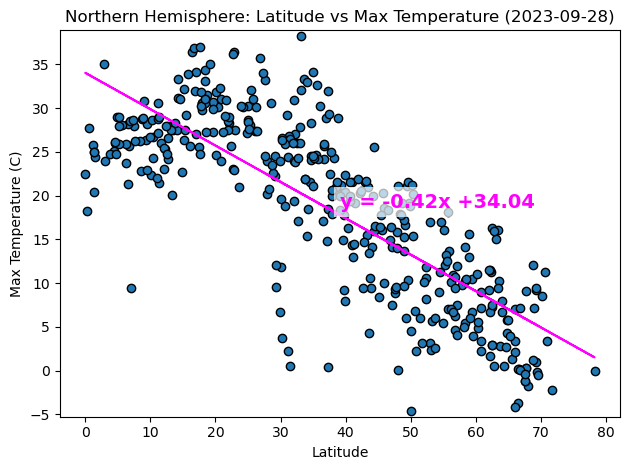

In [52]:
# Linear regression on Northern Hemisphere 
min_y=city_data_df["Max Temp C"].min()
max_y=city_data_df["Max Temp C"].max()
lin_reg(northern_hemi_df,"Lat","Max Temp C","Latitude","Max Temperature","C","Northern Hemisphere:", min_y, max_y)


The r-value is:0.8468397239196098


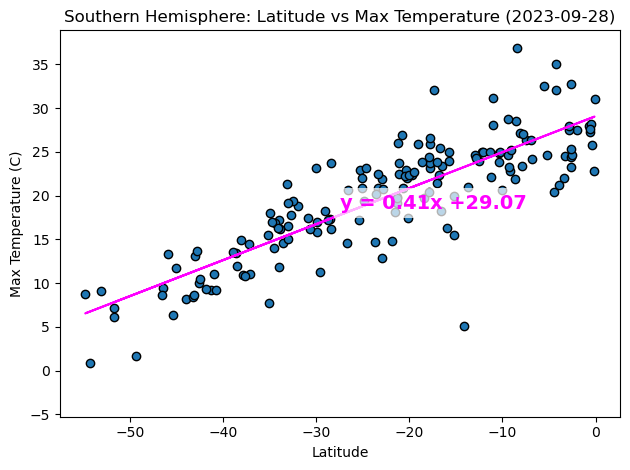

In [53]:
#Linear regression on Southern Hemisphere
lin_reg(southern_hemi_df,"Lat","Max Temp C","Latitude","Max Temperature","C","Southern Hemisphere:", min_y, max_y)



**Discussion about the linear relationship:** there is a strong correlation between latitude and temperature. However, for the Southern Hemisphere, the correlation is positive, which means that the closer to the area with latitude=0, the higher is  temperature. For the Northern Hemisphere the correlation is negative, meaning that moving away from the equator, the temperature decreases. From the above, we can conclude that the warmest temperatures is near the equator (latitude=0). As we move further away from the equator in either direction, temperatures become colder. In both directions temperature changes with almost the same pace (slopes are very close 0.41 and -0.42)

### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.13205546584879024


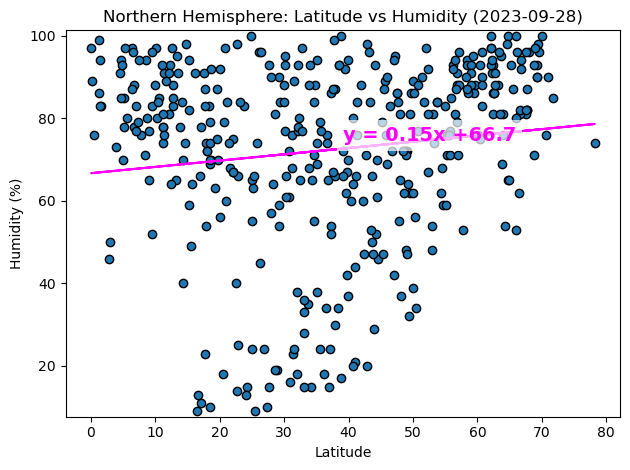

In [54]:
# Northern Hemisphere
min_y=city_data_df["Humidity"].min()
max_y=city_data_df["Humidity"].max()
lin_reg(northern_hemi_df,"Lat","Humidity","Latitude","Humidity","%","Northern Hemisphere:",min_y, max_y)



The r-value is:0.08914438565568843


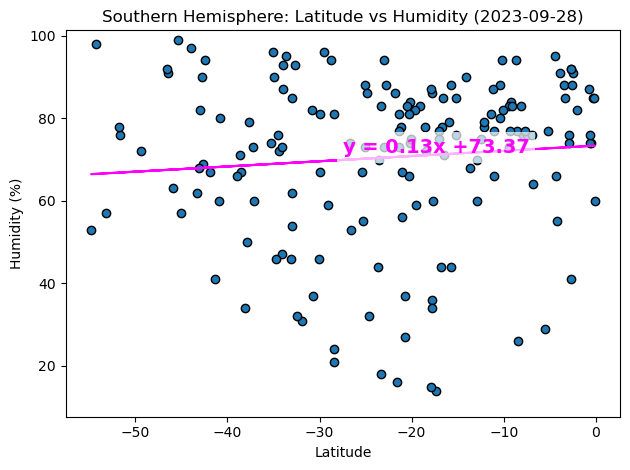

In [55]:
# Southern Hemisphere
lin_reg(southern_hemi_df,"Lat","Humidity","Latitude","Humidity","%","Southern Hemisphere:",min_y, max_y)


**Discussion about the linear relationship:** there is a weak correlation between Latitude and Humidity for both Southern and Northern Hemisphere. Though they both have similar "heart-shape" figure which are kind of reflectional symmetry. This could mean that both hemispheres have similar humidity pattern.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.11826182307017429


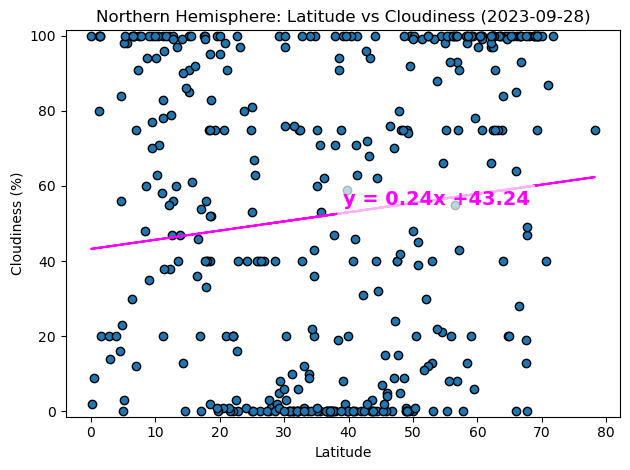

In [56]:
# Northern Hemisphere
min_y=city_data_df["Cloudiness"].min()
max_y=city_data_df["Cloudiness"].max()
lin_reg(northern_hemi_df,"Lat","Cloudiness","Latitude","Cloudiness","%","Northern Hemisphere:", min_y, max_y)


The r-value is:0.10217164821708088


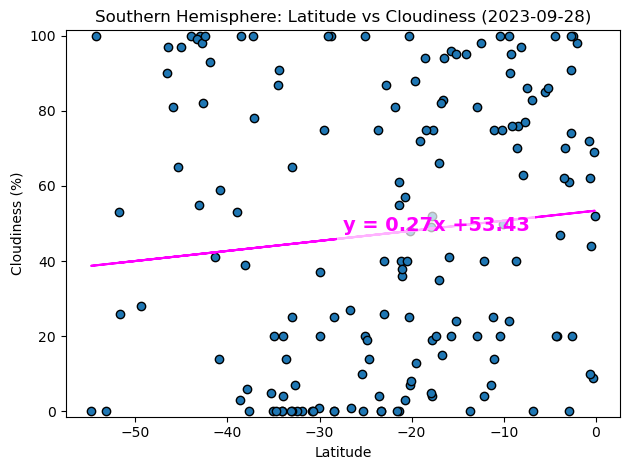

In [57]:
# Southern Hemisphere
lin_reg(southern_hemi_df,"Lat","Cloudiness","Latitude","Cloudiness","%","Southern Hemisphere:", min_y, max_y)


**Discussion about the linear relationship:** there is a weak correlation between Latitude and Cloudiness for both Southern and Northern Hemisphere. We can notice slight accumulation at the top and bottom for Northern Hemisphere, which means that the rate of cities with either high or low cloudiness is high in comaprison to cities with middle cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:-0.01624353087023527


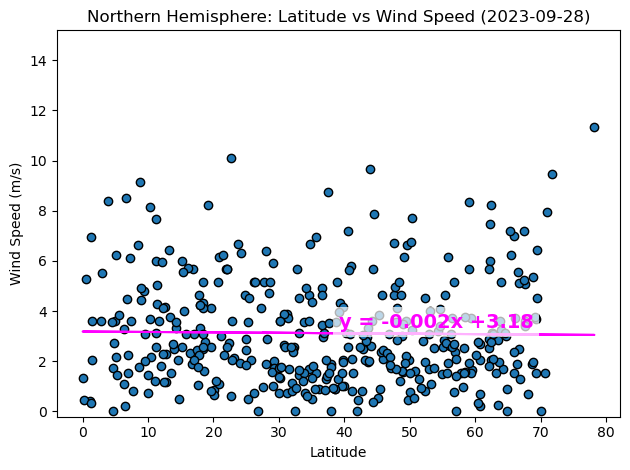

In [58]:
# Northern Hemisphere
min_y=city_data_df["Wind Speed"].min()
max_y=city_data_df["Wind Speed"].max()
lin_reg(northern_hemi_df,"Lat","Wind Speed","Latitude","Wind Speed","m/s","Northern Hemisphere:", min_y, max_y)


The r-value is:-0.1334600257479349


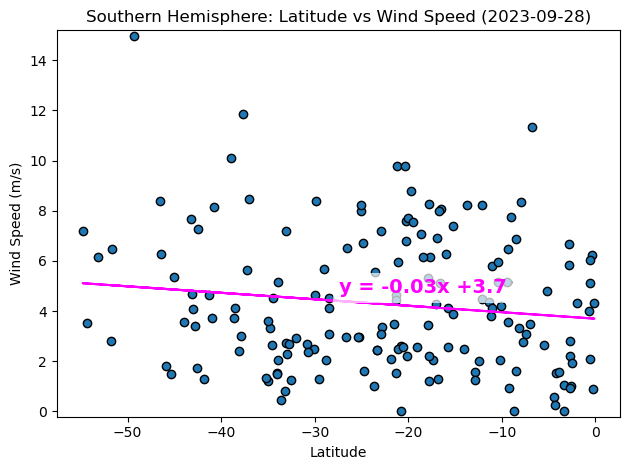

In [59]:
# Southern Hemisphere
lin_reg(southern_hemi_df,"Lat","Wind Speed","Latitude","Wind Speed","m/s","Southern Hemisphere:", min_y, max_y)


**Discussion about the linear relationship:** there is a weak negative correlation between Latitude and Wind Speed for both Southern and Northern Hemisphere. We can see that the higher is wind speed the lower persentage of cities we have in that range with almost zero after 10 m/s per all the latitude values. <br>
Also overall we have more dots in positive latitude range then for negative one, which means that Northern Hemisphere has more cities.